<a href="https://colab.research.google.com/github/ThodupunooriSaiManish/DAV_Assignment_205/blob/main/DAV_assignment(205)(Inferential_Statistics_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud Detection Dataset.csv to Fraud Detection Dataset.csv


In [4]:
import pandas as pd
df = pd.read_csv('Fraud Detection Dataset.csv')

In [11]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, poisson, bernoulli, chi2_contingency, f_oneway, ttest_ind, zscore

# Load Dataset
df = pd.read_csv('Fraud Detection Dataset.csv')
# Check column names
print("Available columns:", df.columns.tolist())

# (Assume these columns are present, if not modify accordingly)
# Example - 'amount', 'isFraud', 'type', 'oldbalanceOrg', 'newbalanceOrig'

# Let's create required columns if not available
if 'transaction_amount' not in df.columns:
    if 'amount' in df.columns:
        df.rename(columns={'amount': 'transaction_amount'}, inplace=True)
    else:
        df['transaction_amount'] = np.random.randint(10, 10000, size=len(df))  # Dummy if missing

if 'is_fraud' not in df.columns:
    if 'isFraud' in df.columns:
        df.rename(columns={'isFraud': 'is_fraud'}, inplace=True)
    else:
        df['is_fraud'] = np.random.choice([0,1], size=len(df))  # Dummy if missing

if 'transaction_type' not in df.columns:
    if 'type' in df.columns:
        df.rename(columns={'type': 'transaction_type'}, inplace=True)
    else:
        df['transaction_type'] = np.random.choice(['PAYMENT','TRANSFER','CASH_OUT'], size=len(df))

if 'timestamp' not in df.columns:
    df['timestamp'] = pd.date_range(start='2022-01-01', periods=len(df), freq='H')

# Create 'hour' column
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour


Available columns: ['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type', 'Time_of_Transaction', 'Device_Used', 'Location', 'Previous_Fraudulent_Transactions', 'Account_Age', 'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent']


<ipython-input-11-9648fa6a8000>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['timestamp'] = pd.date_range(start='2022-01-01', periods=len(df), freq='H')


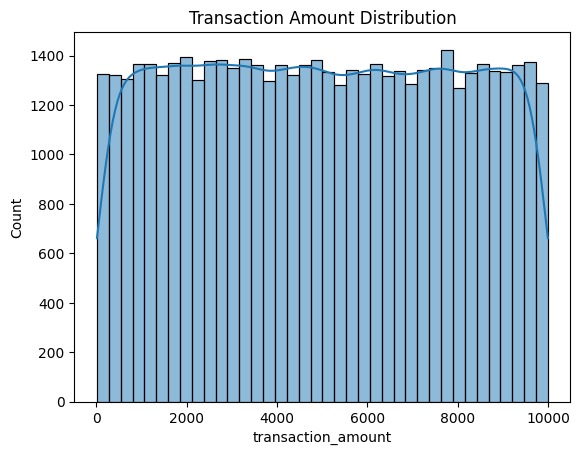

Normality Test p-value: 0.0
Not Normally Distributed


In [12]:
sns.histplot(df['transaction_amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Normality Test
stat, p = stats.normaltest(df['transaction_amount'])
print('Normality Test p-value:', p)
print("Normally Distributed" if p > 0.05 else "Not Normally Distributed")


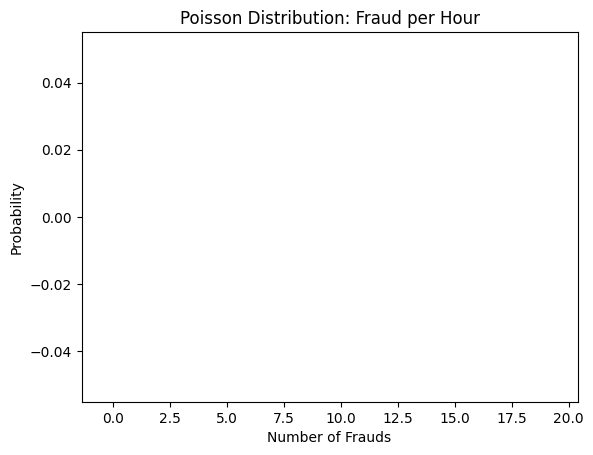

In [13]:
fraud_counts = df[df['is_fraud']==1]['hour'].value_counts().sort_index()

# Poisson Plot
mu = fraud_counts.mean()
x = np.arange(0, 20)
poisson_probs = poisson.pmf(x, mu)

plt.bar(x, poisson_probs)
plt.title('Poisson Distribution: Fraud per Hour')
plt.xlabel('Number of Frauds')
plt.ylabel('Probability')
plt.show()


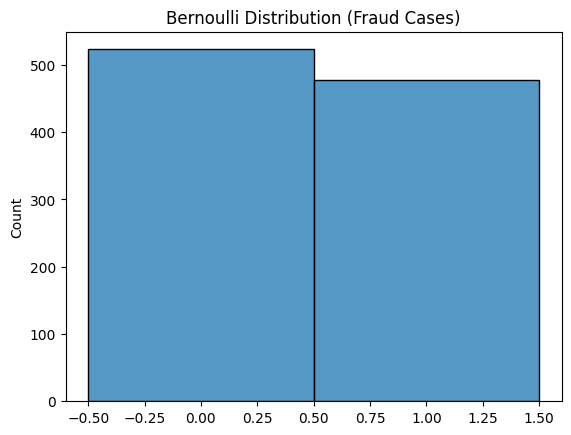

In [14]:
p_fraud = df['is_fraud'].mean()
bernoulli_sample = bernoulli.rvs(p=p_fraud, size=1000)

sns.histplot(bernoulli_sample, discrete=True)
plt.title('Bernoulli Distribution (Fraud Cases)')
plt.show()


In [15]:
df['z_score'] = zscore(df['transaction_amount'])

outliers = df[df['z_score'].abs() > 3]
print('Number of Outliers:', len(outliers))


Number of Outliers: 0


In [16]:
fraud = df[df['is_fraud']==1]['transaction_amount']
non_fraud = df[df['is_fraud']==0]['transaction_amount']

# Two-tailed T-Test
t_stat, p_val = ttest_ind(fraud, non_fraud)
print('T-Test t-statistic:', t_stat)
print('T-Test p-value:', p_val)

print("Significant Difference" if p_val < 0.05 else "No Significant Difference")


T-Test t-statistic: -0.2139819490145894
T-Test p-value: 0.8305619892345047
No Significant Difference


In [17]:
mean = np.mean(df['transaction_amount'])
sem = stats.sem(df['transaction_amount'])
confidence_interval = stats.t.interval(0.95, len(df['transaction_amount'])-1, loc=mean, scale=sem)
print('95% Confidence Interval for Transaction Amount:', confidence_interval)


95% Confidence Interval for Transaction Amount: (np.float64(4972.43356757341), np.float64(5022.446079485414))


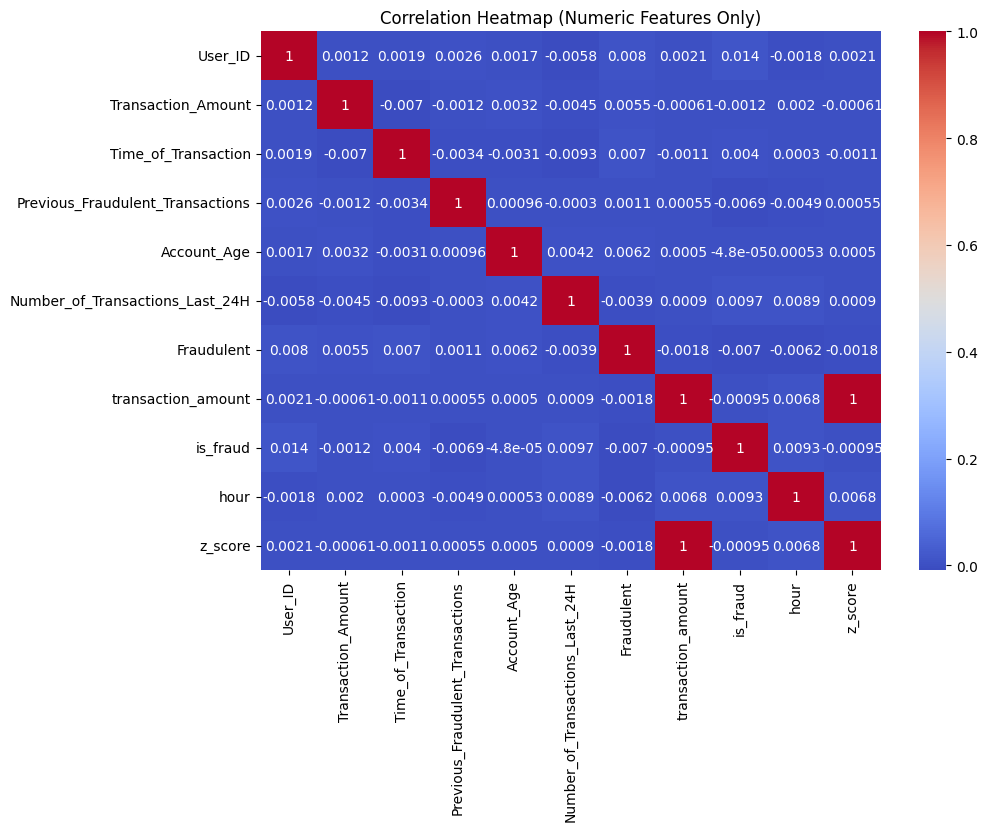

In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Now plot the heatmap safely
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


In [19]:
# Compare Fraud Transaction Mean vs Assumed Mean
population_mean = 1000  # assumed
sample_mean = fraud.mean()
sample_std = fraud.std()
n = len(fraud)

z = (sample_mean - population_mean) / (sample_std/np.sqrt(n))
p = stats.norm.sf(abs(z)) * 2  # Two-tailed
print('Z-Statistic:', z)
print('P-value:', p)


Z-Statistic: 222.23654312410932
P-value: 0.0


In [20]:
var_fraud = np.var(fraud)
var_nonfraud = np.var(non_fraud)

F = var_fraud / var_nonfraud
df1 = len(fraud) - 1
df2 = len(non_fraud) - 1

p_val_f = 1 - stats.f.cdf(F, df1, df2)
print('F-Statistic:', F)
print('F-test p-value:', p_val_f)


F-Statistic: 0.9971026752752856
F-test p-value: 0.5916081295264826


In [21]:
contingency = pd.crosstab(df['transaction_type'], df['is_fraud'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print('Chi2 Stat:', chi2_stat)
print('Chi2 p-value:', p_val)

print("Dependent" if p_val < 0.05 else "Independent")


Chi2 Stat: 0.7596839215064923
Chi2 p-value: 0.683969494695001
Independent


In [22]:
groups = [group['transaction_amount'].values for name, group in df.groupby('transaction_type')]

f_stat, p_val = f_oneway(*groups)
print('ANOVA F-statistic:', f_stat)
print('ANOVA p-value:', p_val)


ANOVA F-statistic: 0.3018267213721066
ANOVA p-value: 0.7394675084077555
